# Checking if all the library is installed in the python environment.

In [2]:
import pkg_resources

lib_required = ['pandas','numpy','matplotlib','seaborn','pytorch','openpyxl']

lib_available = [lib.key for lib in pkg_resources.working_set]

lib_na = set(lib_required) - set(lib_available)

if len(lib_na)!=0:
    print('Install the library {} before proceeding to run codes'.format(lib_na))

Install the library {'pytorch'} before proceeding to run codes


# Importing the libraries required

In [1]:
import pandas as pd, numpy as np,  matplotlib.pyplot as plt 
import openpyxl
from plots import scatter_plot, line_plot, bar_plot

# Importing the dataset

In [2]:
pd.options.display.max_columns=None
df = pd.read_csv('Input_data/loan_data_2007_2014.csv',low_memory=False)
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# A. PLOTS

1. Scatter Plots

In [5]:
data  = df.groupby('grade').agg({'member_id':pd.Series.nunique,'funded_amnt_inv':np.mean}).reset_index()
data

C:\Users\ZH483VT\AppData\Local\Temp\ipykernel_47676\3299305616.py:1: FutureWarning: The provided callable <function mean at 0x0000024A7E342AF0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data  = df.groupby('grade').agg({'member_id':pd.Series.nunique,'funded_amnt_inv':np.mean}).reset_index()


,grade,member_id,funded_amnt_inv
0,A,74867,13325.842733
1,B,136929,13033.417026
2,C,125293,14117.595120
3,D,76888,14974.272830
4,E,35757,17368.439598
5,F,13229,18214.326892
6,G,3322,20217.370298


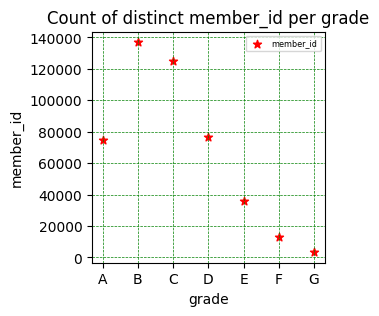

In [5]:
scatter_plot(x='grade' , y='member_id', data=data, label='member_id', marker='*', c='r', alpha=0.5, 
             xlabel='grade', ylabel='member_id',title='Count of distinct member_id per grade',figure_size=(3,3),
                 loc='upper right',fontsize='xx-small')

2. Line plots

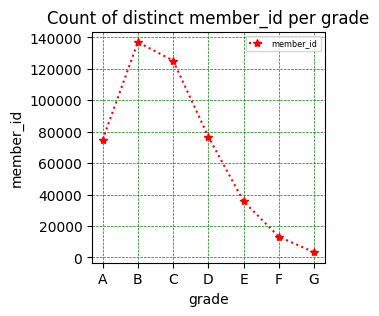

In [6]:
line_plot(x='grade', y='member_id', data=data, label='member_id', marker='*', c='r', alpha=0.5, 
             xlabel='grade', ylabel='member_id',title='Count of distinct member_id per grade',figure_size=(3,3),
                 loc='upper right',fontsize='xx-small')

3. Bar Plot

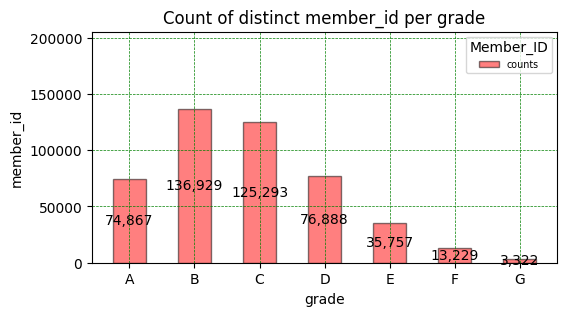

In [7]:
bar_plot(x='grade', y='member_id', data=data,width=0.5,c='r',edgecolor='k',linewidth=1,alpha=0.5,
         xlabel='grade', ylabel='member_id',
         title='Count of distinct member_id per grade',figure_size=(6,3),
         labels=['counts'],loc='upper right',fontsize='x-small', leg_title='Member_ID')

In [8]:
species = ('Adelie', 'Chinstrap', 'Gentoo')
sex_counts = {
    'Male': np.array([73, 34, 61]),
    'Female': np.array([73, 34, 58]),
}

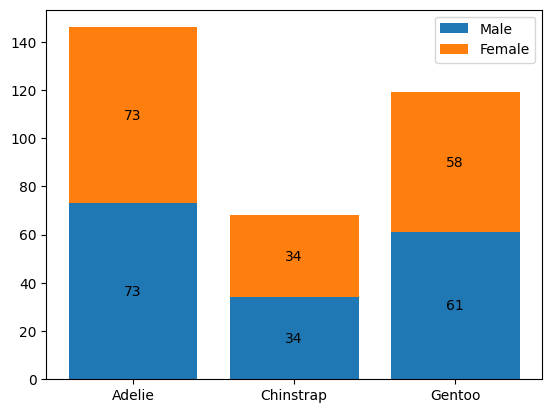

In [9]:
bottom=np.zeros(3)
plt.plot()
p = plt.bar(species,sex_counts['Male'],bottom=bottom)
plt.bar_label(p,label_type='center')
bottom+=sex_counts['Male']
q = plt.bar(species,sex_counts['Female'],bottom=bottom)
plt.bar_label(q,label_type='center')

plt.legend(labels=['Male','Female'])
plt.show()

4. Histogram

5. Pie Chart

6. TWINX Plot with two y axis

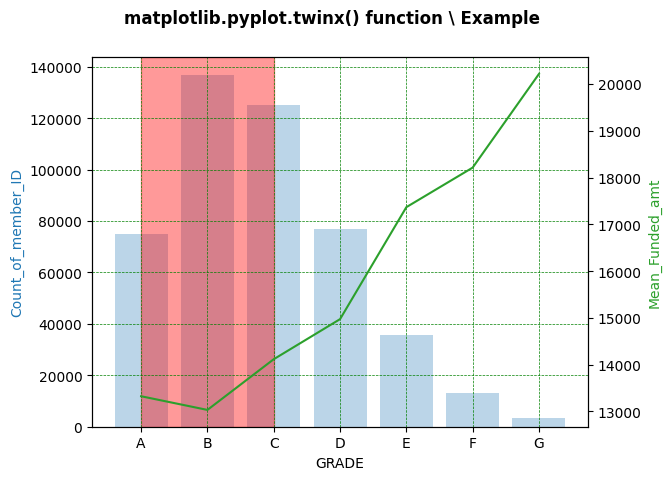

In [10]:
fig, ax1 = plt.subplots() 
   
color = 'tab:blue'
ax1.set_xlabel('GRADE') 
ax1.set_ylabel('Count_of_member_ID', color = color) 
ax1.bar(data.grade, data.member_id, color = color,linestyle="--", alpha=0.3,linewidth =5) 
# ax1.tick_params(axis ='y', labelcolor = color) 
ax1.grid(color = 'green', linestyle = '--', linewidth = 0.5)
ax1.axvspan('A','C', ymin = 0, ymax = 1,alpha=0.4,color='red') 
ax2 = ax1.twinx() 
   
color = 'tab:green'
ax2.set_ylabel('Mean_Funded_amt', color = color) 
ax2.plot(data.grade, data.funded_amnt_inv, color = color) 
# ax2.tick_params(axis ='y', labelcolor = color) 
  
fig.suptitle('matplotlib.pyplot.twinx() function \ Example\n\n', fontweight ="bold") 
plt.show()

# B. Univariate Analysis - Missing value treatment, outlier treatment, variable transformation, feature selection for multi-variate analysis

In [11]:
def Data_Summary(input_data):
    # Calculating the Missing percentage of all the columns 
    
    df1 = pd.DataFrame(input_data.dtypes).reset_index().rename(columns={'index':'Col_name',0:'data_types'})
    df2 = df2 = pd.DataFrame(input_data.isnull().mean().mul(100)
                             .apply('{:.2f}%'.format)).reset_index().rename(columns={'index':'Col_name',0:'Missing_percentage'})
    df3 = df1.merge(df2,how='left',on='Col_name')
    df3['Miss_perc_bucket'] = pd.cut(df3['Missing_percentage'].str.replace('%','').astype(float),bins=5)

    # 5 bins have been created as per missing percentage calculating the coverage of columns in each bins

    df4 = pd.DataFrame(df3.Miss_perc_bucket.value_counts()).reset_index()
    df4['perc_of_tot'] = df4['count'].apply(lambda x: x/df4['count'].sum()).mul(100).apply('{:.2f}%'.format) 


    # Writting the Missing_summary, other dataframe in excel files in different sheets

    with pd.ExcelWriter("Data_Summary.xlsx", date_format="YYYY-MM-DD",
                        datetime_format="YYYY-MM-DD HH:MM:SS") as writer:
        
        df3.to_excel(writer,sheet_name="Missing_percentage",index=True)  
        df4.to_excel(writer,sheet_name="Missing_percentage",index=True,startcol=len(df3.columns)+5)
    
    return df3, df4

In [109]:
df1 = pd.DataFrame(input_data.dtypes).reset_index().rename(columns={'index':'Col_name',0:'data_types'})
df2 = df2 = pd.DataFrame(input_data.isnull().mean().mul(100)
                            .apply('{:.2f}%'.format)).reset_index().rename(columns={'index':'Col_name',0:'Missing_percentage'})
df3 = df1.merge(df2,how='left',on='Col_name')
df3['Miss_perc_bucket'] = pd.cut(df3['Missing_percentage'].str.replace('%','').astype(float),bins=5)

# 5 bins have been created as per missing percentage calculating the coverage of columns in each bins

df4 = pd.DataFrame(df3.Miss_perc_bucket.value_counts()).reset_index()
df4['perc_of_tot'] = df4['count'].apply(lambda x: x/df4['count'].sum()).mul(100).apply('{:.2f}%'.format) 


# Writting the dataframe in excel files in different sheets

with pd.ExcelWriter("Data_Summary.xlsx", date_format="YYYY-MM-DD",
                    datetime_format="YYYY-MM-DD HH:MM:SS") as writer:
    
    df3.to_excel(writer,sheet_name="Missing_percentage",index=True)  
    df4.to_excel(writer,sheet_name="Missing_percentage",index=True,startcol=len(df3.columns)+5)

display(df3)
display
    

,Col_name,data_types,Missing_percentage,Miss_perc_bucket
0,id,int64,0.00%,"(-0.1, 20.0]"
1,member_id,int64,0.00%,"(-0.1, 20.0]"
2,loan_amnt,int64,0.00%,"(-0.1, 20.0]"
3,funded_amnt,int64,0.00%,"(-0.1, 20.0]"
4,funded_amnt_inv,float64,0.00%,"(-0.1, 20.0]"
...,...,...,...,...
69,all_util,float64,100.00%,"(80.0, 100.0]"
70,total_rev_hi_lim,float64,15.07%,"(-0.1, 20.0]"
71,inq_fi,float64,100.00%,"(80.0, 100.0]"
72,total_cu_tl,float64,100.00%,"(80.0, 100.0]"


,Miss_perc_bucket,count,perc_of_tot
0,"(-0.1, 20.0]",52,70.27%
1,"(80.0, 100.0]",18,24.32%
2,"(40.0, 60.0]",2,2.70%
3,"(60.0, 80.0]",2,2.70%
4,"(20.0, 40.0]",0,0.00%


In [121]:
display('dataframe shape before dropping columns with missing values: {}'.format(input_data.shape))
input_data.dropna(thresh=input_data.shape[0]*0.20, axis=1,inplace=True)
display('dataframe shape after dropping columns with missing values: {}'.format(input_data.shape))

'dataframe shape before dropping columns with missing values: (466285, 74)'

'dataframe shape after dropping columns with missing values: (466285, 56)'